In [1]:
# importing packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ls

heart-disease-deeplearning.ipynb    sample_submission_deeplearning.csv
heart-disease-knn.ipynb             sample_submission_logreg.csv
heart-disease-logistic.ipynb        test_values.csv
model_file.h5                       train_labels.csv
sample_submission.csv               train_values.csv


In [3]:
# importing files

labels=pd.read_csv('train_labels.csv')
values=pd.read_csv('train_values.csv')

In [4]:
# data exploration

labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
values.shape    #there are 13 variables and 180 entries

(180, 14)

In [7]:
np.sum(labels['patient_id']==values['patient_id'])   # checking that patient_id are the same in the two files

180

In [8]:
# Data manipulation. Converting strings of columns 'thal' in numbers

def texttonumber(xx):
    nentries=xx.shape[0]
    for i in range(nentries):
        if xx.loc[i,'thal']=='normal':
            xx.loc[i,'thal']=0
        elif xx.loc[i,'thal']=='fixed_defect':
            xx.loc[i,'thal']=1
        elif xx.loc[i,'thal']=='reversible_defect':
            xx.loc[i,'thal']=2

texttonumber(values)   

newvalues=values.drop(columns=['patient_id'])
print(newvalues.shape)

newvalues.head()

(180, 13)


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0


In [9]:
newvalues.info()   #all the variables are integer of float number. The patient ID is not a variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(12)
memory usage: 18.4 KB


(180, 13)
(180,)


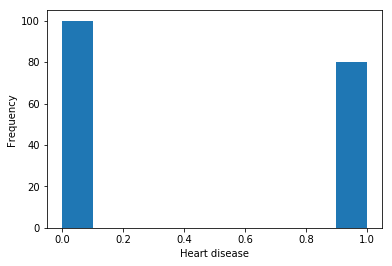

In [10]:
# definition of the array characterizing the training set


X=np.array(newvalues)     # I save in X my training variables 
y=np.array(labels['heart_disease_present'])    # I save in y my training results

print(X.shape)
print(y.shape)

plt.hist(y)
plt.xlabel('Heart disease')
plt.ylabel('Frequency')
plt.show()

#normalizing the variables manually to have reproducibility on the training set

def scaling(xx):
    mm=np.mean(X,axis=0)
    ss=np.std(X,axis=0)
    return (xx-mm)/ss    

X_scaled=scaling(X)

In [11]:
# Here I start the machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,log_loss
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [12]:
# interaction terms  (they do not improve the model in this case)

# I introduce interaction terms
#poly=PolynomialFeatures(2)
#X_interaction=poly.fit_transform(X)
#X_scaled=X_interaction

Ranking of the features
[ 9  2 13  8  3  6  7 12  5  4 10 11  1]
[ 8  1 12  7  2  5  6 11  4  3  9 10  1]
[ 7  1 11  6  1  4  5 10  3  2  8  9  1]
[ 6  1 10  5  1  3  4  9  2  1  7  8  1]
[5 1 9 4 1 2 3 8 1 1 6 7 1]
[4 1 8 3 1 1 2 7 1 1 5 6 1]
[3 1 7 2 1 1 1 6 1 1 4 5 1]
[2 1 6 1 1 1 1 5 1 1 3 4 1]
[1 1 5 1 1 1 1 4 1 1 2 3 1]
[1 1 4 1 1 1 1 3 1 1 1 2 1]
[1 1 3 1 1 1 1 2 1 1 1 1 1]
[1 1 2 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


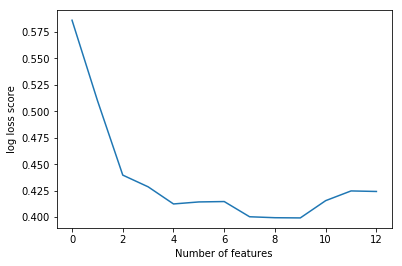

In [13]:
# Recursive feature elimination, useful to find the most significant features. 8 features looks a good number using the training set, but using all the feautres appears better when the test set is used 

variabililist=[]
scorelist=[]

logreg=LogisticRegression(solver='liblinear')

print('Ranking of the features')
print('========================================')
for i in range(X.shape[1]):
    rfe = RFE(logreg,i+1)
    rfe = rfe.fit(X,y)
    variabililist.append(rfe.support_)
    print(rfe.ranking_)

variabili=np.array(variabililist)
variabili.shape

for i in range(X.shape[1]):
    X_scaled2=scaling(X)
    X_scaled=X_scaled2[:,variabili[i,:]]
    x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)   # spliting the dataset into training and testing set
    logreg.fit(x_train,y_train)         #fit the model using the training set 
    y_pred=logreg.predict(x_test)       #predictions to be compared with the test set
    scorelist.append(np.mean(cross_val_score(logreg,X_scaled,y,cv=5,scoring='neg_log_loss')))

plt.plot(-np.array(scorelist))
plt.xlabel('Number of features')
plt.ylabel('log loss score')
plt.show()

In [14]:
nfeatures=X.shape[1]   #I use all the feature

X_scaled2=scaling(X)
X_scaled=X_scaled2[:,variabili[nfeatures-1,:]]

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2)   # spliting the dataset into training and testing set


# uncomment below, to use the entire dataset
#x_train=X_scaled
#y_train=y
#x_test=X_scaled
#y_test=y

#logreg=RandomForestClassifier()
logreg.fit(x_train,y_train)         #fit the model using the training set 
y_pred=logreg.predict(x_test)       #predictions to be compared with the test set

print("----------------------------------------------------") 
print("Confusion matrix \n"+str(confusion_matrix(y_pred,y_test))) 
print("----------------------------------------------------") 
print("Report \n"+str(classification_report(y_pred,y_test))) 
print("----------------------------------------------------")
print("Cross validation "+str(np.mean(cross_val_score(logreg,X_scaled,y,cv=5,scoring='roc_auc'))))    # cross validation with the entire dataset
print("Cross validation "+str(np.mean(cross_val_score(logreg,X_scaled,y,cv=5,scoring='neg_log_loss')))) 

----------------------------------------------------
Confusion matrix 
[[18  4]
 [ 3 11]]
----------------------------------------------------
Report 
             precision    recall  f1-score   support

          0       0.86      0.82      0.84        22
          1       0.73      0.79      0.76        14

avg / total       0.81      0.81      0.81        36

----------------------------------------------------
Cross validation 0.884375
Cross validation -0.4242225454095003


In [15]:
# parameter tuning  (just an attempt, not useful to improve the model)

param_grid={'penalty':['l1','l2']}
logreg_cv=GridSearchCV(logreg,param_grid,cv=5)
logreg_cv.fit(X_scaled,y)  

print(logreg_cv.best_params_)
print("Cross validation "+str(np.mean(cross_val_score(logreg_cv,X_scaled,y,cv=5,scoring='neg_log_loss')))) 

{'penalty': 'l2'}
Cross validation -0.4247883027068463


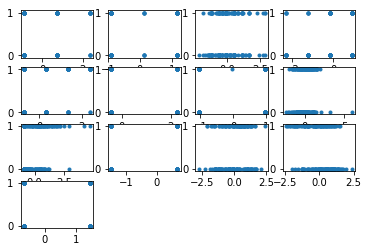

In [16]:
# being the result a binary variable, it is hard to observe correlations by eye

ncols=X_scaled.shape[1]

for i in range(ncols):
    plt.subplot(4,4,i+1)
    plt.plot(X_scaled[:,i],y,'.')
plt.show()

In [27]:
# using the test data provided by the competition

test_values=pd.read_csv('test_values.csv')
test_values.head()

# data manipulation, like for the training set

texttonumber(test_values)      # converting text to number
new_test_values=test_values.drop(columns=['patient_id'])   #dropping the ID column
X_test=np.array(new_test_values)  #converting the variables into array
X_test_scaled2=scaling(X_test)   # normalizing the variables
X_test_scaled=X_test_scaled2[:,variabili[nfeatures-1,:]]   #using only the required features

In [18]:
X_test_scaled.shape

(90, 13)

In [19]:
prediction=logreg.predict(X_test_scaled)

print(prediction)    #0 no desease, 1 desease

[0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0]


In [20]:
predictionproba=logreg.predict_proba(X_test_scaled)     #disease probability (left column no desease, right column desease)

print('some results ...\n \n'+str(predictionproba[0:10,:]))

some results ...
 
[[0.64604539 0.35395461]
 [0.9580902  0.0419098 ]
 [0.05879393 0.94120607]
 [0.96833992 0.03166008]
 [0.05742708 0.94257292]
 [0.98056697 0.01943303]
 [0.93334015 0.06665985]
 [0.01942047 0.98057953]
 [0.84751163 0.15248837]
 [0.84973243 0.15026757]]


In [21]:
# preparing the dataset for the submission

dictionary={'patient_id':test_values['patient_id'],'heart_disease_present':predictionproba[:,1]}

df=pd.DataFrame(dictionary)
df.to_csv('sample_submission_logreg.csv',index=False)

df.head()

,patient_id,heart_disease_present
0,olalu7,0.353955
1,z9n6mx,0.041910
2,5k4413,0.941206
3,mrg7q5,0.031660
4,uki4do,0.942573


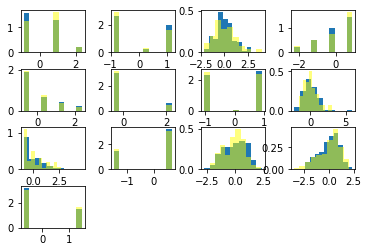

In [22]:
#showing the overlap of the training (blue) and test (yellow) values

ncols=X_scaled.shape[1]

for i in range(ncols):
    plt.subplot(4,4,i+1)
    plt.hist(X_scaled[:,i],density=True)
    plt.hist(X_test_scaled[:,i],density=True,alpha=0.5,color='yellow')
    plt.subplots_adjust(hspace =0.4,wspace=0.4)
plt.show()

In [23]:
#exploring the difference between training and test dataset

jj=0

print(np.mean(X[:,jj]))
print(np.std(X[:,jj]))

print(np.mean(X_test[:,jj]))
print(np.std(X_test[:,jj]))

1.55
0.6171169527191207
1.6555555555555554
0.5992794026738578


In [24]:
# comparison between results and prediction, when there is disagreement 

ypredict=logreg.predict(X_scaled)

In [25]:
peppe=ypredict!=y

print('real values      ',y[peppe])
print('predicted values ',ypredict[peppe])

real values       [1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0]
predicted values  [0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1]


In [26]:
values.loc[peppe,:]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
3,l2xjde,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,2,178,1,0,0,2,270,4.2,1,59,145,0
12,mpggsq,1,0,140,3,0,0,0,335,0.0,1,64,158,0
19,30v796,1,0,136,2,2,1,2,319,0.0,0,58,152,0
21,k8899q,1,2,108,4,3,1,0,233,0.1,1,52,147,0
23,5g9v0h,1,1,160,4,0,0,2,228,2.3,1,66,138,0
28,lek9q9,2,0,140,3,0,0,2,185,3.0,1,60,155,0
45,gj1e5z,1,2,124,2,0,0,0,261,0.3,1,57,141,0
51,ejo7p3,1,0,130,3,1,0,0,315,1.9,1,43,162,0
54,27oevk,1,0,130,4,0,0,2,330,0.0,0,61,169,0
